### Step1: Create a CNN model

In [1]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define Project Folder
FOLDERNAME = 'APEGAN'

%cd drive/MyDrive/$FOLDERNAME

Mounted at /content/drive
[Errno 2] No such file or directory: 'drive/MyDrive/APEGAN'
/content


In [2]:
# Define device
import torch
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print('Device: ', device)

Device:  cuda


In [3]:
# Data pre-processing
import torchvision.transforms as T
transform = T.Compose([T.ToTensor(), T.RandomAutocontrast()])

In [4]:
# Load Dataset
import torchvision.datasets as dset

train_data = dset.MNIST(root="train", train=True, download=True, transform=transform)
val_data = dset.MNIST(root="val", train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 106949368.08it/s]


Extracting train/MNIST/raw/train-images-idx3-ubyte.gz to train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 54936822.60it/s]

Extracting train/MNIST/raw/train-labels-idx1-ubyte.gz to train/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 34143108.06it/s]


Extracting train/MNIST/raw/t10k-images-idx3-ubyte.gz to train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18955750.02it/s]


Extracting train/MNIST/raw/t10k-labels-idx1-ubyte.gz to train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 111876646.49it/s]

Extracting val/MNIST/raw/train-images-idx3-ubyte.gz to val/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 114711831.27it/s]


Extracting val/MNIST/raw/train-labels-idx1-ubyte.gz to val/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32229897.46it/s]


Extracting val/MNIST/raw/t10k-images-idx3-ubyte.gz to val/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6970555.71it/s]

Extracting val/MNIST/raw/t10k-labels-idx1-ubyte.gz to val/MNIST/raw



In [5]:
# Check data
num_train = len(train_data)
num_val = len(val_data)
print('Number of training:', num_train)
print('Number of validation:', num_val)

Number of training: 60000
Number of validation: 10000


In [6]:
# Build Model
import torch.nn as nn

model = nn.Sequential(
    # N x 1 x 28 x 28
    nn.Conv2d(1, 64, 3, 1, 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # N x 64 x 14 x 14
    nn.Conv2d(64, 64, 3, 1, 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    # N x 64 x 7 x 7
    nn.Flatten(),
    nn.Linear(in_features=64*7*7, out_features=10)
)

# Move model to GPU
model = model.cuda()

In [7]:
# Create Mini-batches
from torch.utils.data import DataLoader

mini_trains = DataLoader(train_data, batch_size=128, shuffle=True)
mini_vals = DataLoader(val_data, batch_size=128, shuffle=True)

In [8]:
# Training Procedure
def train(num_epoch, model, mini_trains, mini_vals, device, loss_function, optimizer):
  for epoch in range(num_epoch):
    num_iters = 0
    for x, y in mini_trains:
      model.train()
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      loss = loss_function(scores, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if num_iters % 10 == 0:
        evaluate_predictor(model, epoch, mini_vals, device)
      num_iters += 1

In [9]:
# Validating Procedure
def evaluate_predictor(model, epoch, mini_vals, device):
  model.eval()
  with torch.no_grad():
    acc_count = 0
    for x, y in mini_vals:
      x = x.to(device)
      y = y.to(device)
      scores = model(x)
      predictions = scores.max(1)[1]
      acc = predictions.eq(y).sum().item()
      acc_count += acc
    print(f"Epoch[{epoch+1}] Acc: {acc_count/num_val}")

In [10]:
# Define loss function & optimizer
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [11]:
# Start training
train(1, model, mini_trains, mini_vals, device, loss_function, optimizer)

Epoch[1] Acc: 0.1629
Epoch[1] Acc: 0.7406
Epoch[1] Acc: 0.8992
Epoch[1] Acc: 0.9011
Epoch[1] Acc: 0.943
Epoch[1] Acc: 0.9506
Epoch[1] Acc: 0.9618
Epoch[1] Acc: 0.9621
Epoch[1] Acc: 0.9663
Epoch[1] Acc: 0.9682
Epoch[1] Acc: 0.9694
Epoch[1] Acc: 0.97
Epoch[1] Acc: 0.971
Epoch[1] Acc: 0.9737
Epoch[1] Acc: 0.9772
Epoch[1] Acc: 0.9749
Epoch[1] Acc: 0.9792
Epoch[1] Acc: 0.974
Epoch[1] Acc: 0.9736
Epoch[1] Acc: 0.9758
Epoch[1] Acc: 0.9747
Epoch[1] Acc: 0.9739
Epoch[1] Acc: 0.976
Epoch[1] Acc: 0.9773
Epoch[1] Acc: 0.9788
Epoch[1] Acc: 0.9819
Epoch[1] Acc: 0.9707
Epoch[1] Acc: 0.9798
Epoch[1] Acc: 0.9801
Epoch[1] Acc: 0.9793
Epoch[1] Acc: 0.983
Epoch[1] Acc: 0.9824
Epoch[1] Acc: 0.9815
Epoch[1] Acc: 0.9838
Epoch[1] Acc: 0.9851
Epoch[1] Acc: 0.9772
Epoch[1] Acc: 0.9799
Epoch[1] Acc: 0.9852
Epoch[1] Acc: 0.9814
Epoch[1] Acc: 0.982
Epoch[1] Acc: 0.9773
Epoch[1] Acc: 0.9808
Epoch[1] Acc: 0.9784
Epoch[1] Acc: 0.9823
Epoch[1] Acc: 0.9816
Epoch[1] Acc: 0.9782
Epoch[1] Acc: 0.9852


### Step2: Generate Adversarial Examples

In [12]:
from tqdm import tqdm
from torch.autograd import Variable

def fgsm(model, x, y, loss_function, eps, min=0, max=1): ###eps
  if not isinstance(x, Variable): # 用來判斷x是否為Variable類別
    x, y = Variable(x.to(device), requires_grad=True), Variable(y.to(device))
  x.requires_grad = True  # requires_grad=True才可使用backwards方法來計算並累積梯度
  scores = model(x)
  loss = loss_function(scores, y)
  model.zero_grad()
  loss.backward(retain_graph=True)
  return Variable(torch.clamp(x.data + eps * torch.sign(x.grad.data), min=min, max=max))
  # clamp將第一項的值限制在[min,max]之間

def accuracy(scores, y):
  predictions = scores.max(1)[1]
  acc = predictions.eq(y).sum().item()
  return acc

In [13]:
normal_data, adv_data = None, None
train_acc, adv_acc, train_n = 0, 0, 0
eps = 0.15
for x, y in tqdm(mini_trains, total=len(mini_trains), leave=False):
  x, y = Variable(x.to(device)), Variable(y.to(device)) ###換成variable
  scores = model(x)
  train_acc += accuracy(scores, y)

  x_adv = fgsm(model, x, y, loss_function, eps)
  y_adv = model(x_adv)
  adv_acc += accuracy(y_adv, y)
  train_n += y.size(0)

  x, x_adv = x.data, x_adv.data
  if normal_data is None:
    normal_data, adv_data = x, x_adv
  else:
    normal_data = torch.cat((normal_data, x))
    adv_data = torch.cat((adv_data, x_adv))

print("Accuracy(normal) {:.6f}, Accuracy(FGSM) {:.6f}".format(train_acc / train_n * 100, adv_acc / train_n * 100))
torch.save({"normal": normal_data, "adv": adv_data}, "data.tar")
torch.save({"state_dict": model.state_dict()}, "cnn.tar")

Accuracy(normal) 98.308333, Accuracy(FGSM) 75.918333


### Step3: GAN model

In [14]:
num_channels = 1

In [15]:
# Build Generator
class Generator(nn.Module):
  def __init__(self, num_channels):
    super().__init__()
    self.conv2d1 = nn.Conv2d(num_channels, 64, 4, 2, 1, bias=False) # add bias=False
    self.bn2d1 = nn.BatchNorm2d(64)
    self.conv2d2 = nn.Conv2d(64, 128, 4, 2, 1, bias=False)
    self.bn2d2 = nn.BatchNorm2d(128)
    self.deconv2d3 = nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False)
    self.bn2d3 = nn.BatchNorm2d(64)
    self.deconv2d4 = nn.ConvTranspose2d(64, num_channels, 4, 2, 1, bias=False)
  def forward(self, x):
    out = self.conv2d1(x)
    out = self.bn2d1(out)
    out = nn.functional.relu(out) ###用relu還是leakyrelu
    out = self.conv2d2(out)
    out = self.bn2d2(out)
    out = nn.functional.relu(out)
    out = self.deconv2d3(out)
    out = self.bn2d3(out)
    out = nn.functional.relu(out)
    out = self.deconv2d4(out)
    out = nn.functional.tanh(out)
    return out

In [16]:
# Initialize Generator
g_model = Generator(num_channels)
g_model = g_model.cuda()

In [17]:
# Build Discriminator
class Discriminator(nn.Module):
  def __init__(self, num_channels):
    super().__init__()
    self.conv2d1 = nn.Conv2d(num_channels, 64, 3, 2, 1) #N*1*28*28 #N*64*14*14
    self.conv2d2 = nn.Conv2d(64, 128, 3, 2, 1) #N*128*7*7
    self.bn2d2 = nn.BatchNorm2d(128)
    self.conv2d3 = nn.Conv2d(128, 256, 3, 2, 1) #N*256*4*4
    self.bn2d3 = nn.BatchNorm2d(256)
    self.fc = nn.Linear(4096, 1) ###1024→4096
  def forward(self, x):
    out = self.conv2d1(x)
    out = nn.functional.leaky_relu(out)
    out = self.conv2d2(out)
    out = self.bn2d2(out)
    out = nn.functional.leaky_relu(out)
    out = self.conv2d3(out)
    out = self.bn2d3(out)
    out = nn.functional.leaky_relu(out)
    out = torch.flatten(out, 1) ###
    out = self.fc(out)
    out = nn.functional.sigmoid(out)
    return out

In [18]:
# Initialize Discriminator
d_model = Discriminator(num_channels)
d_model = d_model.cuda()

### Step4: Use GAN to de-noise

In [19]:
lr = 0.0002
batch_size = 128
xi1 = 0.7
xi2 = 0.3
betas = (0.5, 0.999)
check_path = "./checkpoint/test"
num_epochs = 5  # try first

In [20]:
###copy only
import matplotlib.pyplot as plt

def show_images(e, x, x_adv, x_fake, save_dir):
  fig, axes = plt.subplots(3, 5, figsize=(10, 6))
  for i in range(5):
    axes[0, i].axis("off"), axes[1, i].axis("off"), axes[2, i].axis("off")
    axes[0, i].imshow(x[i].cpu().numpy().transpose((1, 2, 0)))
    axes[0, i].set_title("Normal")

    axes[1, i].imshow(x_adv[i].cpu().numpy().transpose((1, 2, 0)))
    axes[1, i].set_title("Adv")

    axes[2, i].imshow(x_fake[i].cpu().numpy().transpose((1, 2, 0)))
    axes[2, i].set_title("APE-GAN")
  plt.axis("off")
  plt.savefig(os.path.join(save_dir, "result_{}.png".format(e)))

In [21]:
from torch.utils.data import TensorDataset
import os

os.makedirs(check_path, exist_ok=True)

train_data = torch.load("data.tar")
x_tmp = train_data["normal"][:5]
x_adv_tmp = train_data["adv"][:5]

train_data = TensorDataset(train_data["normal"], train_data["adv"])
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# in_ch = num_channels
# netG
# netD

g_optimizer = torch.optim.Adam(g_model.parameters(), lr=lr, betas=betas)
d_optimizer = torch.optim.Adam(d_model.parameters(), lr=lr, betas=betas)
bce_loss = nn.BCELoss()
mse_loss = nn.MSELoss()

Epoch	Gen_Loss	Dis_Loss
0	1.200648	0.352137
1	1.395669	0.282167
2	1.483533	0.166229
3	1.399794	0.293307
4	1.579563	0.280269


Generator(
  (conv2d1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2d2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2d2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv2d3): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2d3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv2d4): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)

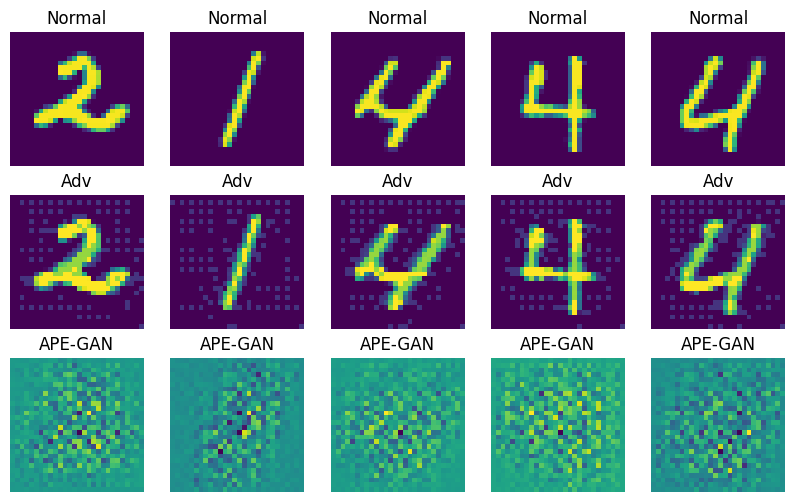

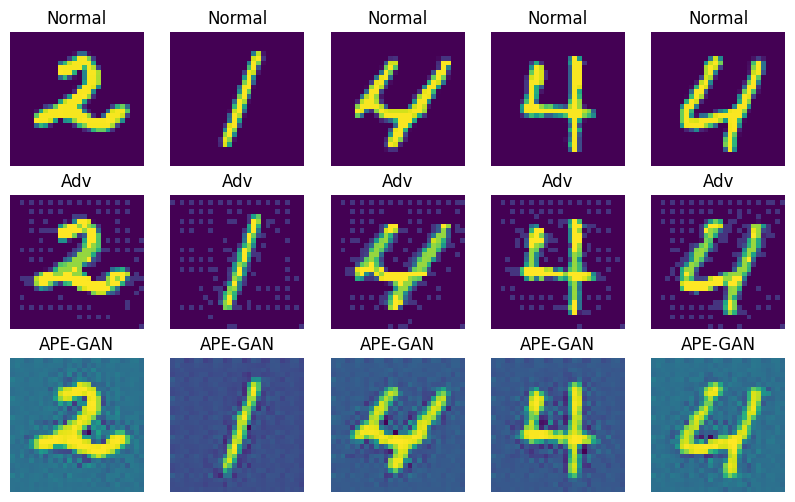

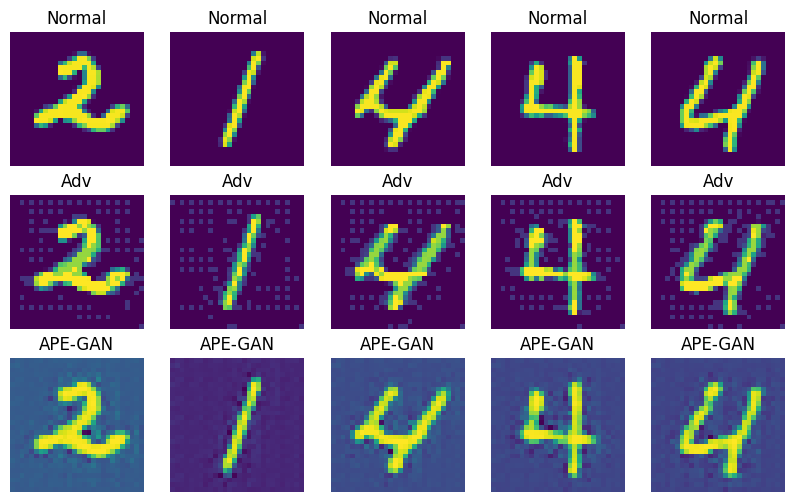

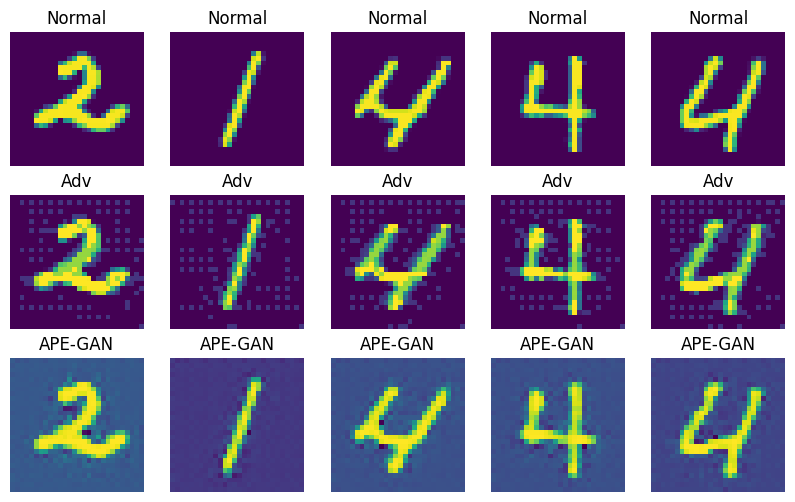

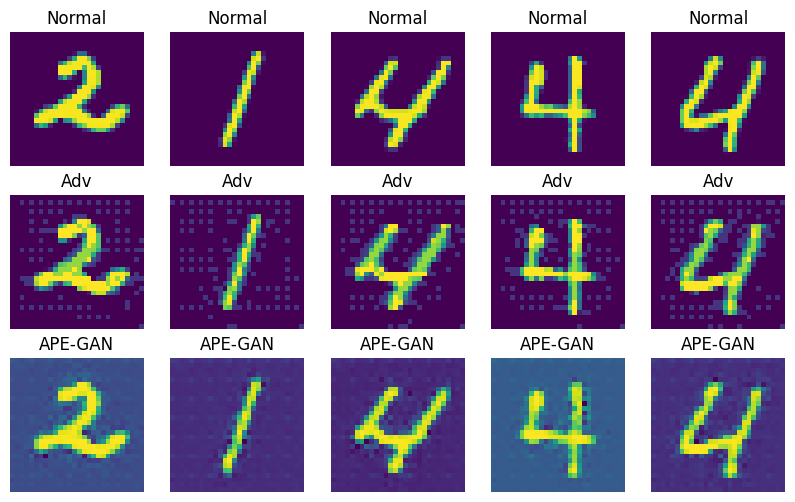

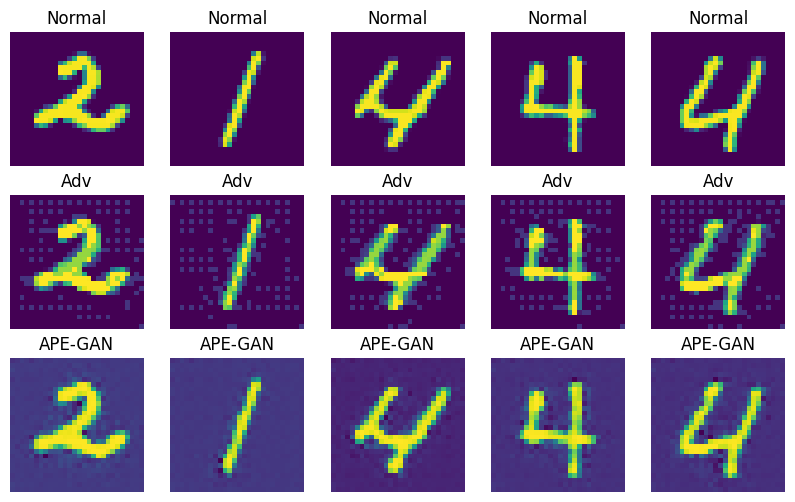

In [22]:
print_str = "\t".join(["{}"] + ["{:.6f}"] * 2)
print("\t".join(["{:}"] * 3).format("Epoch", "Gen_Loss", "Dis_Loss"))

def discriminator_loss(real_output, fake_output):
  real_loss = bce_loss(real_output, torch.ones_like(real_output))
  fake_loss = bce_loss(fake_output, torch.zeros_like(fake_output))
  return real_loss + fake_loss

def generator_loss(fake_output):
  return bce_loss(fake_output, torch.ones_like(fake_output))

for e in range(num_epochs):
  g_model.eval()
  x_fake = g_model(Variable(x_adv_tmp.cuda())).data
  show_images(e, x_tmp, x_adv_tmp, x_fake, check_path)
  g_model.train()
  gen_loss, dis_loss, n = 0, 0, 0
  for x, x_adv in tqdm(train_loader, total=len(train_loader), leave=False, disable=True):
    current_size = x.size(0)
    x, x_adv = Variable(x.to(device)), Variable(x_adv.to(device))
    # Train Discriminator
    # d_model.zero_grad()
    # print(x_adv.shape)
    real_output = d_model(x) ###.squeeze()
    fake_images = g_model(x_adv)
    fake_output = d_model(fake_images.detach())  ###.squeeze() ###.detach()
    d_loss = discriminator_loss(real_output, fake_output)
    d_optimizer.zero_grad() ###
    d_loss.backward()
    d_optimizer.step()

    # Train Generator
    for _ in range(2):
      # g_model.zero_grad()
      fake_images = g_model(x_adv) ###
      fake_output = d_model(fake_images) ###.squeeze()
      g_loss = xi1 * mse_loss(fake_images, x) + xi2 * generator_loss(fake_output)
      g_optimizer.zero_grad()
      g_loss.backward()
      g_optimizer.step()

    gen_loss += g_loss * current_size  ###應該是g_loss? train.py寫d_loss
    dis_loss += d_loss * current_size
    n += current_size

  print(print_str.format(e, gen_loss / n, dis_loss / n))
  torch.save({"Generator": g_model.state_dict(), "Discriminator": d_model.state_dict()},
             os.path.join(check_path, "{}.tar".format(e+1)))

g_model.eval()
x_fake = g_model(Variable(x_adv_tmp.cuda())).data
show_images(num_epochs, x_tmp, x_adv_tmp, x_fake, check_path)
g_model.train()

